In [1]:
# import des libsb
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [33]:
bleu_ciel = "#1f77b4"      
orange_vif = "#ff7f0e"
vert_prairie = "#2ca02c" 
rouge_brique = "#d62728"
violet = "#9467bd"     
marron_chocolat = "#8c564b"
rose_magenta = "#e377c2"  
vert_olive = "#bcbd22"     
bleu_acier = "#17becf"      
jaune_moutarde = "#dbdb8d"   

In [3]:
# chemins vers jeux de données
train_data_path = '/home/charlemagne/workspace/kaggle_challenge_titanic/data/train.csv'
test_data_path = '/home/charlemagne/workspace/kaggle_challenge_titanic/data/test.csv'

train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

In [4]:
# affiche premières lignes des jeux de données 
train_df_head = train_df.head()
test_df_head = test_df.head()

train_df_head, test_df_head

(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

In [5]:
# Assurez-vous que les visualisations apparaissent dans le notebook
%matplotlib inline

# Définir le style esthétique des graphiques
sns.set_style("whitegrid")

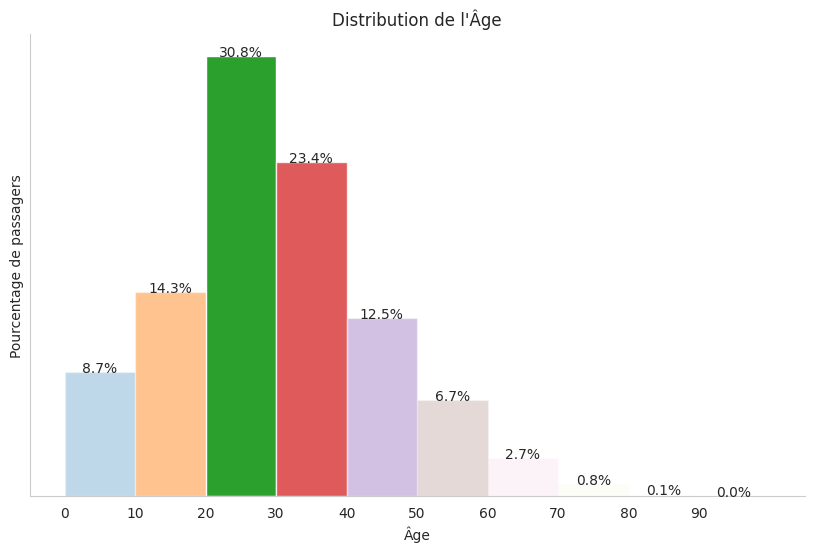

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assurez-vous d'avoir importé le DataFrame 'train_df' correctement

# Total number of non-null ages in the dataframe
total_ages = train_df['Age'].dropna().shape[0]

# Define colors for each bin
colors = [bleu_ciel, orange_vif, vert_prairie, rouge_brique, violet, marron_chocolat, rose_magenta, vert_olive, bleu_acier, jaune_moutarde]

# Histogram plot with each bar representing a 10-year range
plt.figure(figsize=(10, 6))
ax = sns.histplot(train_df['Age'].dropna(), kde=False, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Distribution de l\'Âge')
plt.xlabel('Âge')
plt.ylabel('Pourcentage de passagers')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

# Calculating percentages for each bin
percentages = [(p.get_height() / total_ages) * 100 for p in ax.patches]
max_percentage = max(percentages)

# Set colors and alpha for each bar based on its percentage
for p, color, percentage in zip(ax.patches, colors, percentages):
    alpha = percentage / max_percentage  # Adjust alpha based on percentage
    p.set_facecolor(color)
    p.set_alpha(alpha)

# Hide y-axis labels
ax.set_yticks([])

# Removing lines (axes and grid)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
plt.grid(False)

# Adding the percentage of each 10-year bin inside it
for p, percentage in zip(ax.patches, percentages):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, '{:1.1f}%'.format(percentage), ha="center")

plt.show()


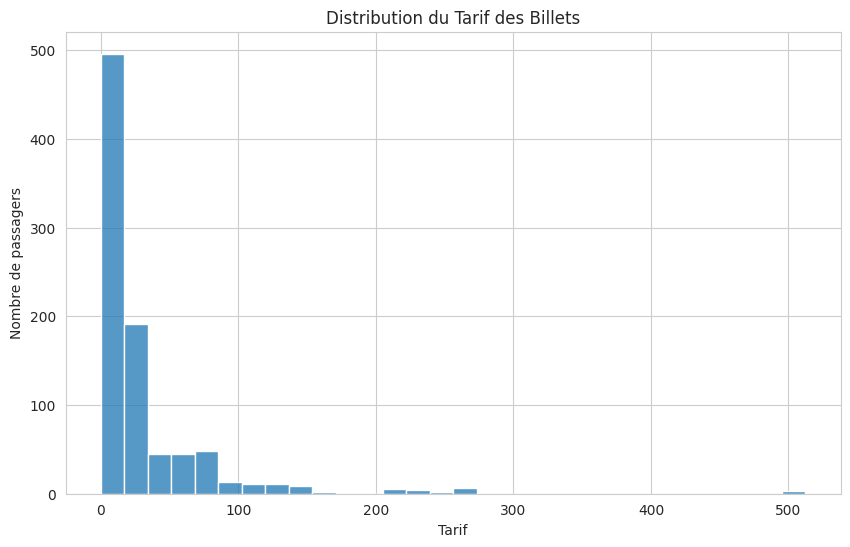

In [7]:
# Histogramme pour la distribution des tarifs
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Fare'].dropna(), kde=False, bins=30)
plt.title('Distribution du Tarif des Billets')
plt.xlabel('Tarif')
plt.ylabel('Nombre de passagers')
plt.show()

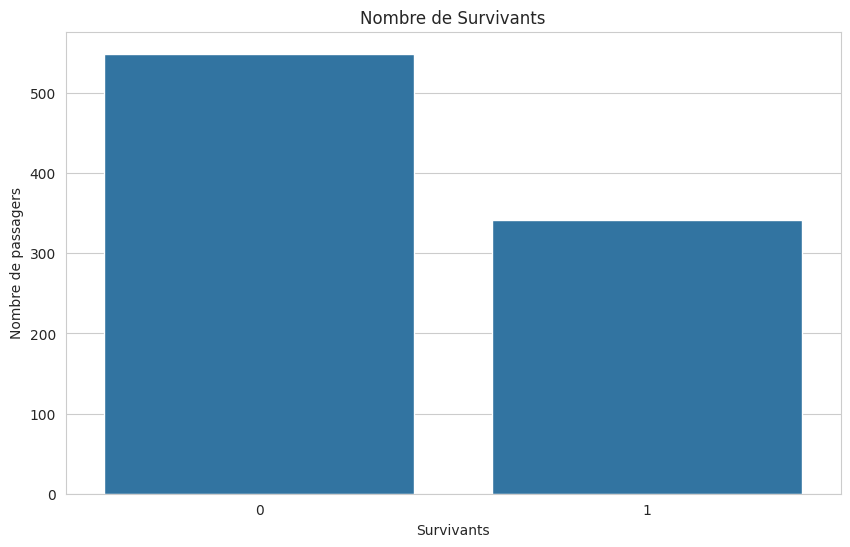

In [8]:
# Graphique du compte des survivants
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=train_df)
plt.title('Nombre de Survivants')
plt.xlabel('Survivants')
plt.ylabel('Nombre de passagers')
plt.show()

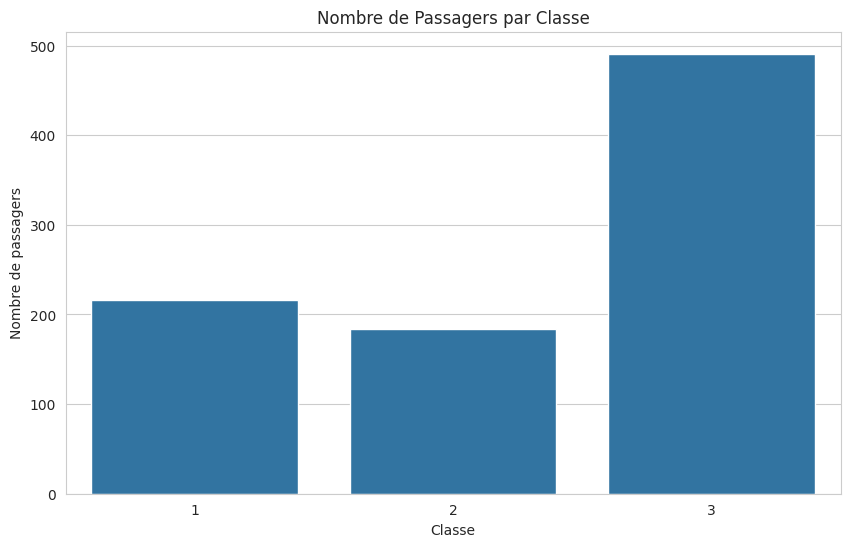

In [9]:
# Graphique du compte des classes
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=train_df)
plt.title('Nombre de Passagers par Classe')
plt.xlabel('Classe')
plt.ylabel('Nombre de passagers')
plt.show()

Text(0, 0.5, 'Nombre de passagers')

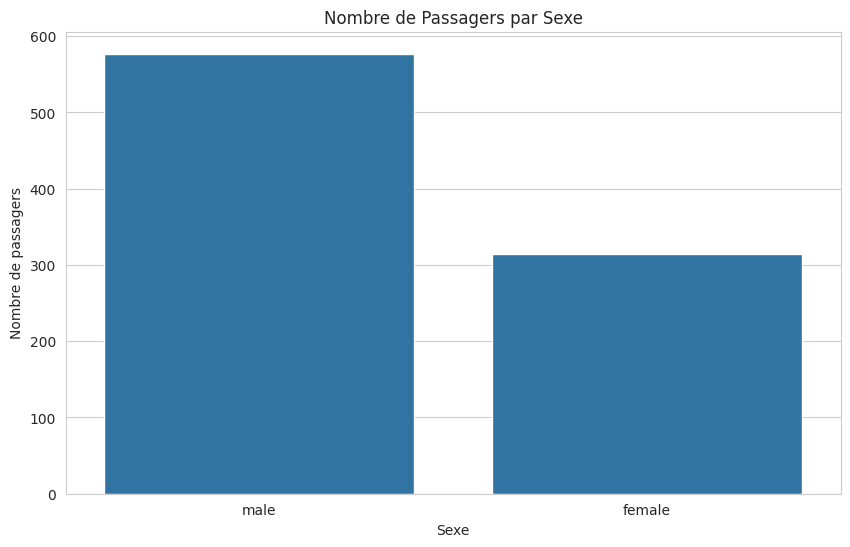

In [10]:
# Graphique du compte des sexes
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=train_df)
plt.title('Nombre de Passagers par Sexe')
plt.xlabel('Sexe')
plt.ylabel('Nombre de passagers')

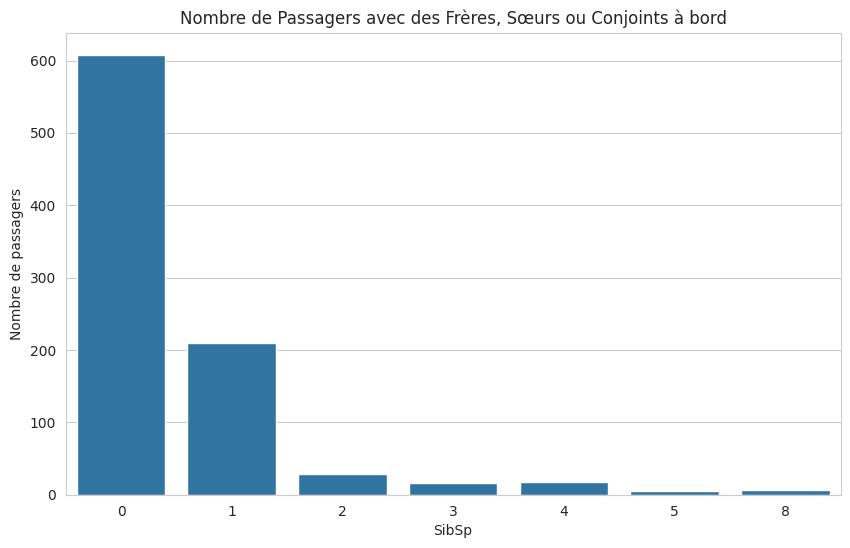

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='SibSp', data=train_df)
plt.title('Nombre de Passagers avec des Frères, Sœurs ou Conjoints à bord')
plt.xlabel('SibSp')
plt.ylabel('Nombre de passagers')
plt.show()

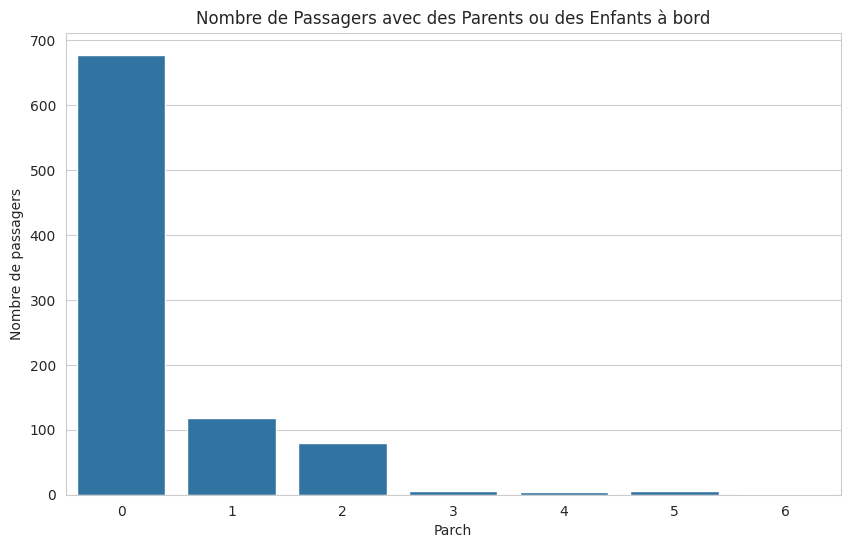

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Parch', data=train_df)
plt.title('Nombre de Passagers avec des Parents ou des Enfants à bord')
plt.xlabel('Parch')
plt.ylabel('Nombre de passagers')
plt.show()

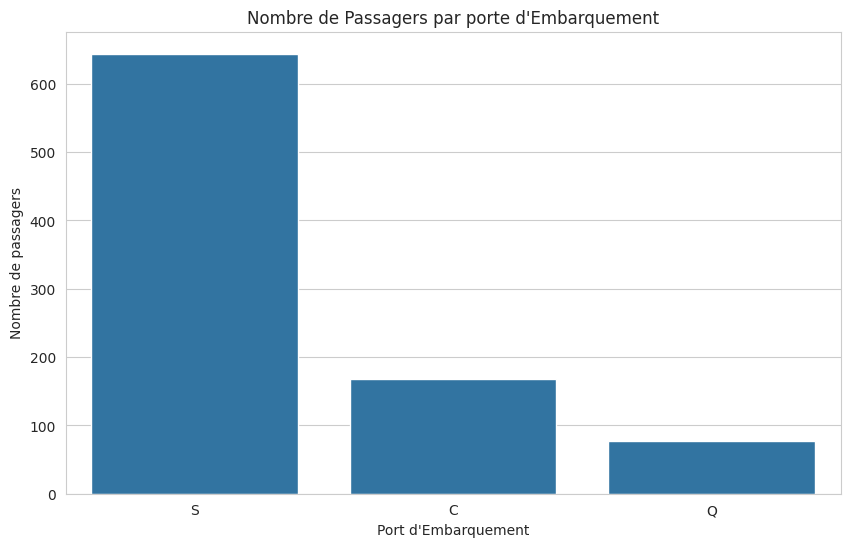

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', data=train_df)
plt.title("Nombre de Passagers par porte d'Embarquement")
plt.xlabel("Port d'Embarquement")
plt.ylabel("Nombre de passagers")
plt.show()